<a href="https://colab.research.google.com/github/NithinUppara2003/Projects/blob/main/SoyaWeedDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!ls -lha kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

ls: cannot access 'kaggle.json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

 99% 2.35G/2.37G [00:20<00:00, 140MB/s]
100% 2.37G/2.37G [00:20<00:00, 122MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/weed-detection-in-soybean-crops.zip','r') as zipObj:
  zipObj.extractall('/content/weed-detection-in-soybean-crops')

FileNotFoundError: [Errno 2] No such file or directory: '/content/weed-detection-in-soybean-crops.zip'

In [ ]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import cv2
import io
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.utils import shuffle
from keras import layers,models,optimizers
import ipywidgets as widgets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,Dropout,BatchNormalization,Concatenate,AveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from google.colab.patches import cv2_imshow

In [ ]:
labels=["broadleaf","grass","soil","soybean"]

##convert to table formate and one hot encoding

In [ ]:
X=[]
Y=[]
image_size=(227,227)
for i in labels:
  path="/content/weed-detection-in-soybean-crops/dataset/"+i+"/"
  print(path)
  fileRead=glob.glob(path+"*")
  print(len(fileRead))

  for j in fileRead:
    image=cv2.imread(j)
    image=cv2.resize(image,image_size)
    X.append(image)
    Y.append(i)

X=np.array(X)
Y=np.array(Y)

In [ ]:
X.shape,Y.shape

NameError: name 'X' is not defined

In [ ]:
for i in labels:
  path="//content/weed-detection-in-soybean-crops/dataset/"+i+"/"
  print(path)
  fileRead=glob.glob(path+"*")
  print(fileRead[5])

NameError: name 'labels' is not defined

In [ ]:
plt.imshow(X[1515])

In [ ]:
Y[0]

'broadleaf'

In [ ]:
Y[1515]

'grass'

In [ ]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))

Y = np.array(Temp_y)
Y = to_categorical(Y)

print(Y[0])

NameError: name 'Y' is not defined

In [ ]:
Y[0],Y[1515],Y[2345],Y[3456]

(array([1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32))

In [ ]:
Alex_X_train,Alex_X_test,Alex_Y_train,Alex_Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


##AlexNet

In [ ]:
AlexNet = Sequential()


#1st Conv2D Layer
AlexNet.add(Conv2D(96, kernel_size = (11, 11), strides = (4, 4),
                 padding = "valid", activation  = 'relu', input_shape = (227, 227, 3)))
AlexNet.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",
                       data_format = None))



#2nd Conv2D Layer

AlexNet.add(Conv2D(256, kernel_size = (5, 5), strides = 1,
                 padding = "same", activation  = 'relu'))

AlexNet.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",#"same"
                       data_format = None))




#3rd Conv2D Layer
AlexNet.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))



#4th Conv2D Layer
AlexNet.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))


#5th Conv2D Layer

AlexNet.add(Conv2D(256, kernel_size = (3, 3), strides = 1,
                 padding = "same", activation  = 'relu'))

AlexNet.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",#"same"
                       data_format = None))


# Flatten Layer
AlexNet.add(Flatten())

AlexNet.add(Dense(4096, activation = 'relu'))
AlexNet.add(Dense(4096, activation = 'relu'))
#AlexNet.add(Dense(1000, activation = 'relu'))
AlexNet.add(Dense(4, activation = 'softmax'))

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.0001)

In [ ]:
AlexNet.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
alex_history=AlexNet.fit(Alex_X_train,Alex_Y_train, validation_data=(Alex_X_test,Alex_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
384/384 [==============================] - 2021s 5s/step - loss: 0.6898 - accuracy: 0.8327 - val_loss: 0.2556 - val_accuracy: 0.9071
Epoch 2/10
326/384 [========================>.....] - ETA: 4:40 - loss: 0.2905 - accuracy: 0.8941

In [ ]:
train_loss = alex_history.history['loss']
train_accuracy = alex_history.history['accuracy']
test_loss = alex_history.history['val_loss']
test_accuracy = alex_history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)

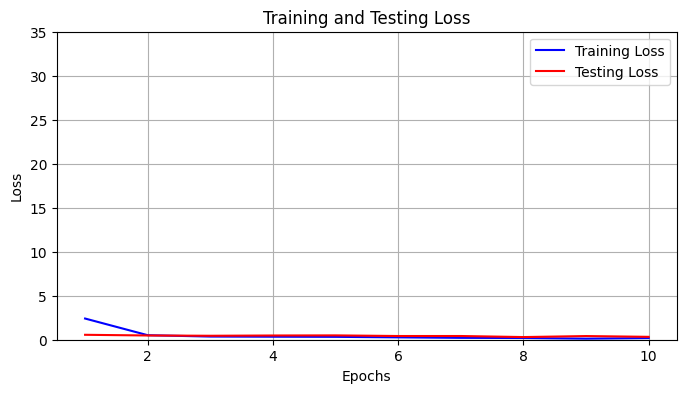

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.show()

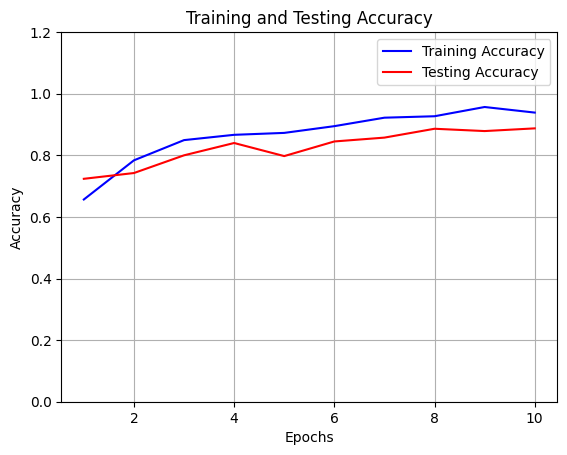

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred = AlexNet.predict(Alex_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Alex_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Normalize the confusion matrix to convert to decimal values
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

101/101 [==============================] - 1s 13ms/step


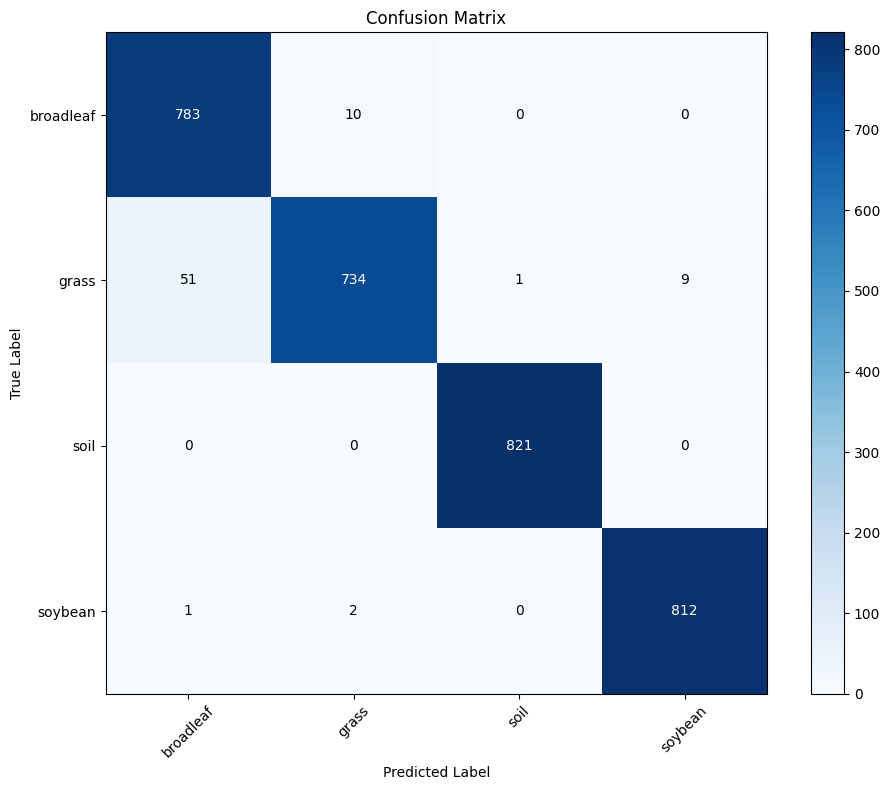

In [ ]:
y_pred = AlexNet.predict(Alex_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Alex_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def Alex_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = AlexNet.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 32ms/step


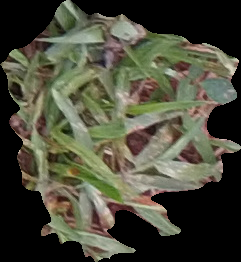

Predicted class: grass


In [ ]:
Alex_pred('/content/drive/MyDrive/soyaweed/grass/445.tif')

##GoogleNet

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense, Concatenate

def inception_module(prev_layer, filters):
    tower_1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(prev_layer)

    tower_3x3_reduce = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(prev_layer)
    tower_3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(tower_3x3_reduce)

    tower_5x5_reduce = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(prev_layer)
    tower_5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(tower_5x5_reduce)

    tower_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(prev_layer)
    tower_pool_1x1 = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(tower_pool)

    return Concatenate(axis=-1)([tower_1x1, tower_3x3, tower_5x5, tower_pool_1x1])

# Input layer
input_layer = Input(shape=(227, 227, 3))

# Convolution and Pooling layers
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Inception modules
x = inception_module(x, [64, 128, 128, 32, 32, 32])
x = inception_module(x, [128, 192, 96, 64, 64, 64])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inception_module(x, [192, 208, 48, 64, 64, 64])
x = inception_module(x, [160, 224, 64, 64, 64, 128])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inception_module(x, [128, 256, 64, 64, 64, 128])
x = inception_module(x, [112, 288, 64, 64, 64, 128])
x = inception_module(x, [256, 320, 128, 128, 128, 128])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Fully connected layers
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(4, activation='softmax')(x)  # Assuming 4 classes for the classification task

# Create the model
GoogleNet = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
GoogleNet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Print the model summary
GoogleNet.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 114, 114, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 57, 57, 64)  0           ['conv2d_5[0][0]']               
                                                                                              

In [ ]:
google_history=AlexNet.fit(Google_X_train,Google_Y_train, validation_data=(Google_X_test,Google_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
101/101 [==============================] - 5s 52ms/step - loss: 0.0733 - accuracy: 0.9792 - val_loss: 0.3557 - val_accuracy: 0.8821
Epoch 2/10
101/101 [==============================] - 5s 46ms/step - loss: 0.1494 - accuracy: 0.9476 - val_loss: 0.5384 - val_accuracy: 0.8027
Epoch 3/10
101/101 [==============================] - 5s 48ms/step - loss: 0.0935 - accuracy: 0.9677 - val_loss: 0.3341 - val_accuracy: 0.8958
Epoch 4/10
101/101 [==============================] - 5s 47ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.4192 - val_accuracy: 0.8685
Epoch 5/10
101/101 [==============================] - 5s 50ms/step - loss: 0.0862 - accuracy: 0.9659 - val_loss: 0.3810 - val_accuracy: 0.8958
Epoch 6/10
101/101 [==============================] - 5s 54ms/step - loss: 0.0930 - accuracy: 0.9662 - val_loss: 0.5663 - val_accuracy: 0.8226
Epoch 7/10
101/101 [==============================] - 6s 57ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.4379 - val_accuracy: 0.8995

In [ ]:
train_loss = google_history.history['loss']
train_accuracy = google_history.history['accuracy']
test_loss = google_history.history['val_loss']
test_accuracy = google_history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

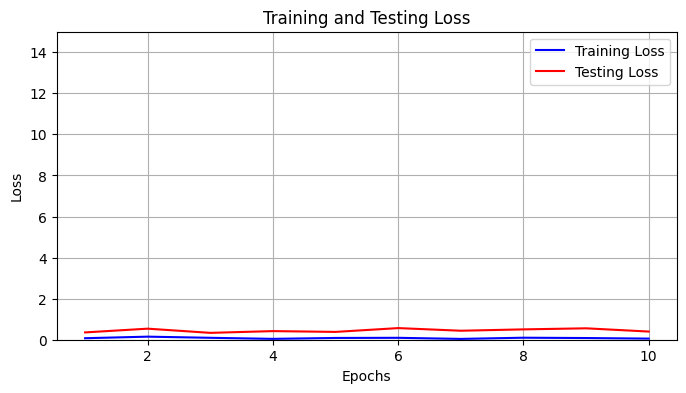

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,15)
plt.legend()
plt.grid(True)
plt.show()

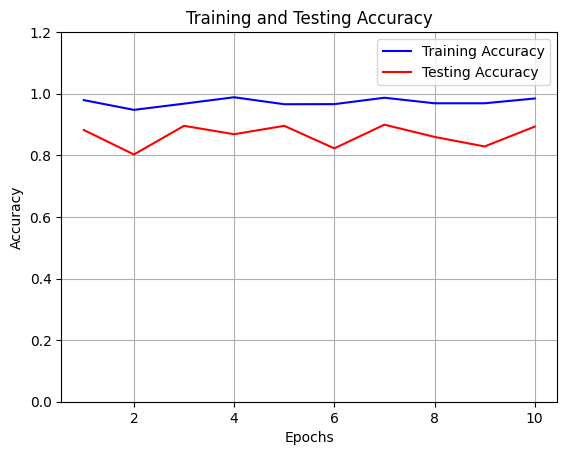

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylim(0,1.2)
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

26/26 [==============================] - 0s 16ms/step


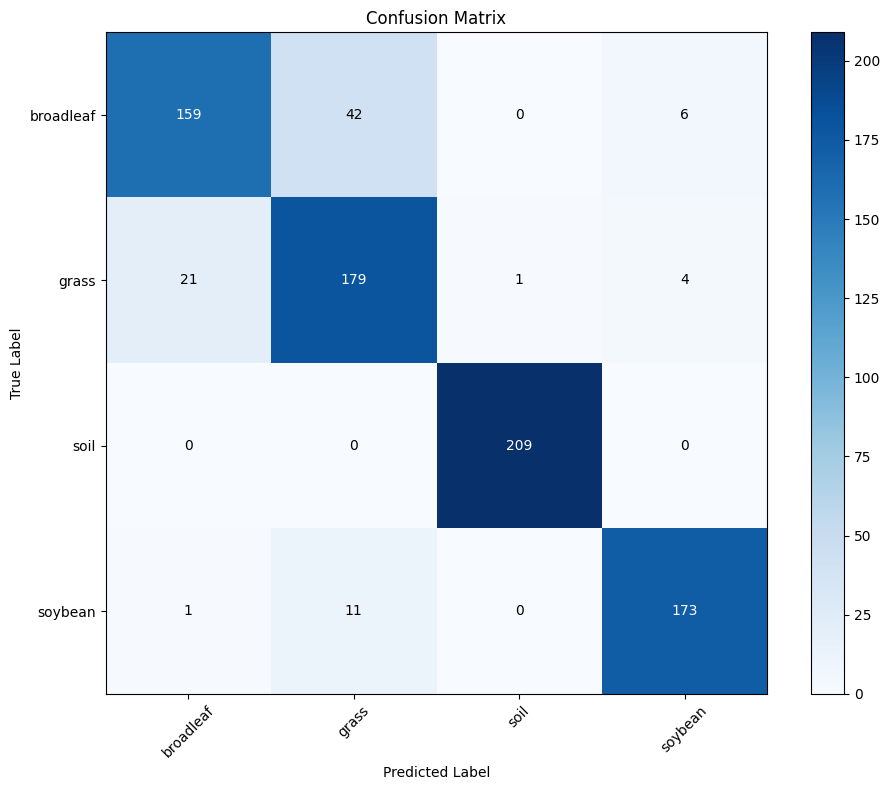

In [ ]:
y_pred = AlexNet.predict(Google_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Google_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

101/101 [==============================] - 1s 13ms/step


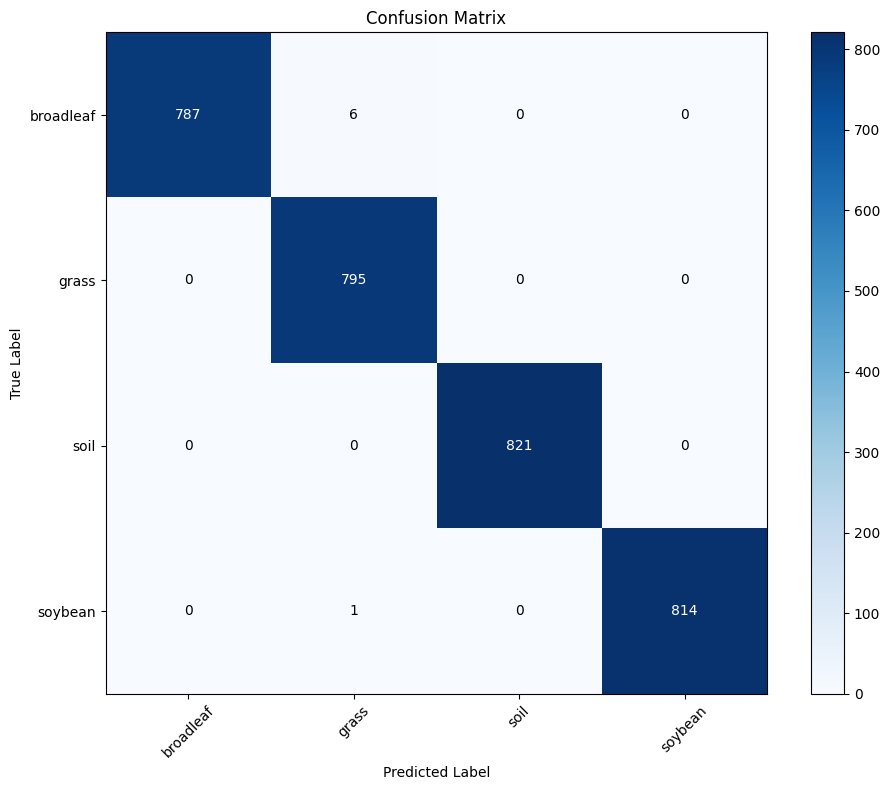

In [ ]:
y_pred = AlexNet.predict(Google_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Google_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def google_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = GoogleNet.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 22ms/step


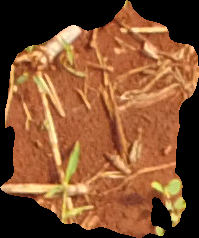

Predicted class: soil


In [ ]:
google_pred('/content/drive/MyDrive/soyaweed/soil/330.tif')

##VGG16

In [ ]:
 Vgg16 = Sequential()

 # Block 1
 Vgg16.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(227, 227, 3)))
 Vgg16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
 Vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Block 2
 Vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
 Vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Block 3
 Vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 Vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Block 4
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Block 5
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
 Vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Classification Head
 Vgg16.add(Flatten())
 Vgg16.add(Dense(4096, activation='relu'))
 Vgg16.add(Dense(4096, activation='relu'))
 Vgg16.add(Dense(len(labels), activation='softmax'))

In [ ]:
Vgg16.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
Vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 227, 227, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 113, 113, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 113, 113, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
vgg16_history=Vgg16.fit(VGG16_X_train,VGG16_Y_train, validation_data=(VGG16_X_test,VGG16_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
100/100 [==============================] - 68s 475ms/step - loss: 0.9535 - accuracy: 0.5644 - val_loss: 0.8212 - val_accuracy: 0.6300
Epoch 2/10
100/100 [==============================] - 46s 460ms/step - loss: 0.6529 - accuracy: 0.6784 - val_loss: 0.7505 - val_accuracy: 0.6162
Epoch 3/10
100/100 [==============================] - 46s 459ms/step - loss: 0.6393 - accuracy: 0.7069 - val_loss: 0.4963 - val_accuracy: 0.7563
Epoch 4/10
100/100 [==============================] - 46s 457ms/step - loss: 0.5704 - accuracy: 0.7372 - val_loss: 0.4654 - val_accuracy: 0.7700
Epoch 5/10
100/100 [==============================] - 46s 463ms/step - loss: 0.5017 - accuracy: 0.7572 - val_loss: 0.4661 - val_accuracy: 0.7837
Epoch 6/10
100/100 [==============================] - 48s 483ms/step - loss: 0.4255 - accuracy: 0.8028 - val_loss: 0.4436 - val_accuracy: 0.8100
Epoch 7/10
100/100 [==============================] - 46s 463ms/step - loss: 0.3710 - accuracy: 0.8438 - val_loss: 0.3302 - val_ac

In [ ]:
train_loss = vgg16_history.history['loss']
train_accuracy = vgg16_history.history['accuracy']
test_loss = vgg16_history.history['val_loss']
test_accuracy = vgg16_history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)



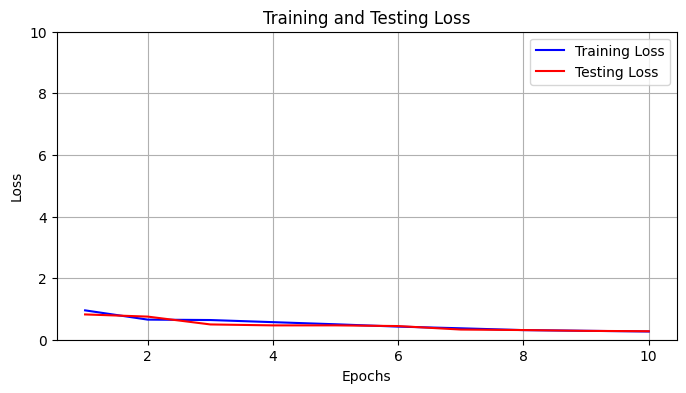

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.legend()
plt.grid(True)
plt.show()

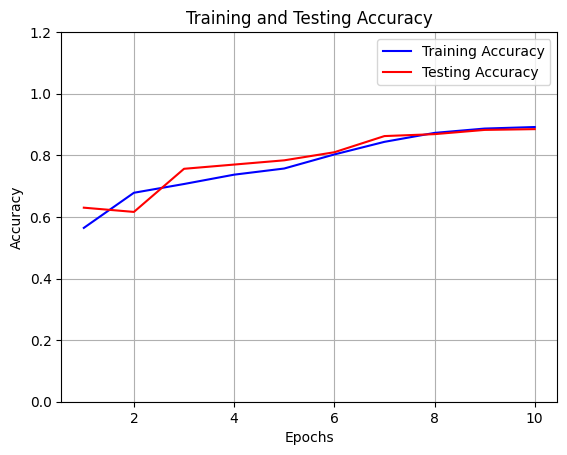

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
plt.show()

25/25 [==============================] - 3s 122ms/step


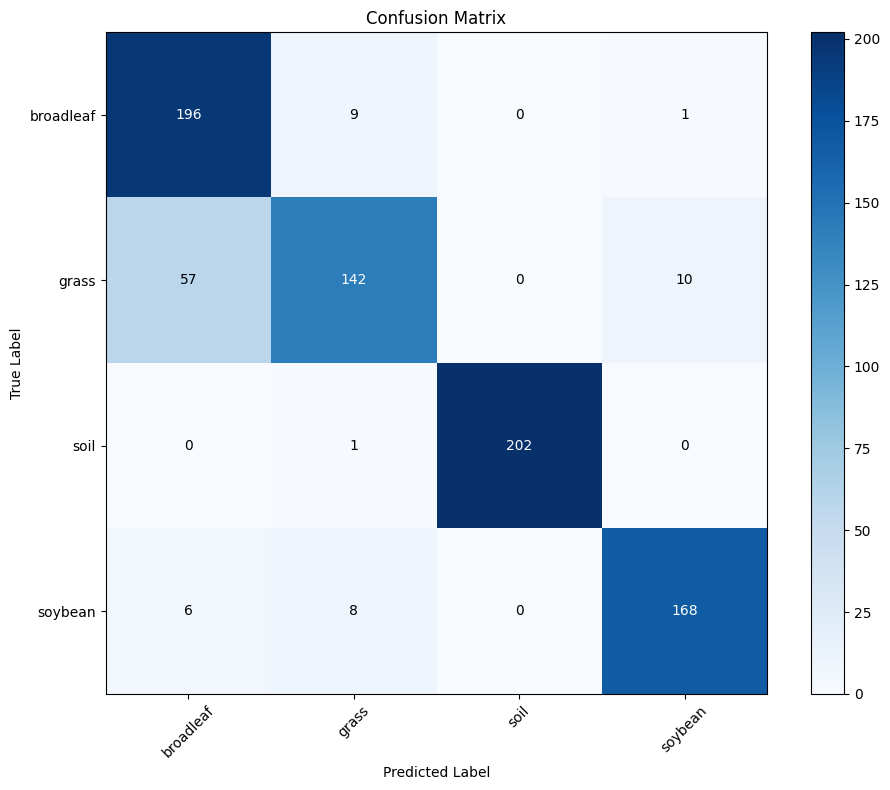

In [ ]:
y_pred = Vgg16.predict(VGG16_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(VGG16_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

100/100 [==============================] - 12s 122ms/step


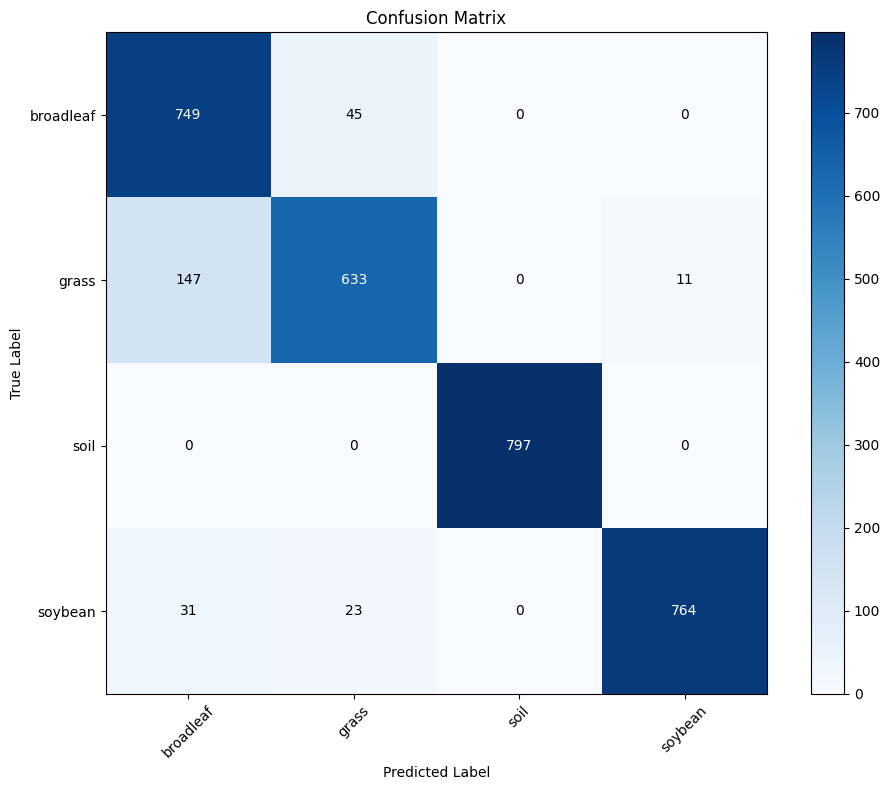

In [ ]:
y_pred = Vgg16.predict(VGG16_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(VGG16_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def Vgg16_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = Vgg16.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 30ms/step


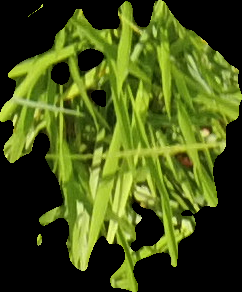

Predicted class: grass


In [ ]:
Vgg16_pred('/content/drive/MyDrive/soyaweed/grass/324.tif')

##VGG19

In [ ]:
Vgg19=Sequential()

#Block1
Vgg19.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(227,227,3)))
Vgg19.add(Conv2D(64,(3,3),activation='relu',padding='same'))
Vgg19.add(MaxPooling2D((2,2),strides=(2,2)))

#Block2
Vgg19.add(Conv2D(128,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(128,(3,3),activation='relu',padding='same'))
Vgg19.add(MaxPooling2D((2,2),strides=(2,2)))

#Block3
Vgg19.add(Conv2D(256,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(256,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(256,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(256,(3,3),activation='relu',padding='same'))
Vgg19.add(MaxPooling2D((2,2),strides=(2,2)))

#Block4
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(MaxPooling2D((2,2),strides=(2,2)))

#Block5
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(Conv2D(512,(3,3),activation='relu',padding='same'))
Vgg19.add(MaxPooling2D((2,2),strides=(2,2)))

#ClassificationHead
Vgg19.add(Flatten())
Vgg19.add(Dense(4096,activation='relu'))
Vgg19.add(Dense(4096,activation='relu'))
Vgg19.add(Dense(len(labels),activation='softmax'))

In [ ]:
Vgg19.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
Vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 113, 113, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
vgg19_history=Vgg19.fit(VGG19_X_train,VGG19_Y_train,validation_data=(VGG19_X_test,VGG19_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
384/384 [==============================] - 252s 595ms/step - loss: 0.5398 - accuracy: 0.7771 - val_loss: 0.3361 - val_accuracy: 0.8693
Epoch 2/10
384/384 [==============================] - 229s 596ms/step - loss: 0.3279 - accuracy: 0.8732 - val_loss: 0.3019 - val_accuracy: 0.8807
Epoch 3/10
384/384 [==============================] - 228s 595ms/step - loss: 0.2535 - accuracy: 0.8979 - val_loss: 0.2031 - val_accuracy: 0.9175
Epoch 4/10
384/384 [==============================] - 862s 2s/step - loss: 0.1926 - accuracy: 0.9242 - val_loss: 0.2193 - val_accuracy: 0.9188
Epoch 5/10
384/384 [==============================] - 227s 590ms/step - loss: 0.1753 - accuracy: 0.9345 - val_loss: 0.1466 - val_accuracy: 0.9430
Epoch 6/10
384/384 [==============================] - 289s 753ms/step - loss: 0.1384 - accuracy: 0.9478 - val_loss: 0.1963 - val_accuracy: 0.9280
Epoch 7/10
384/384 [==============================] - 227s 591ms/step - loss: 0.1012 - accuracy: 0.9634 - val_loss: 0.1385 - va

In [ ]:
train_loss = vgg19_history.history['loss']
train_accuracy = vgg19_history.history['accuracy']
test_loss = vgg19_history.history['val_loss']
test_accuracy = vgg19_history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)



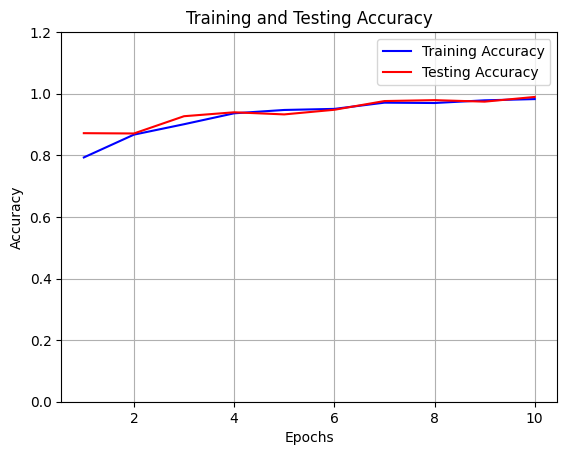

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
plt.show()

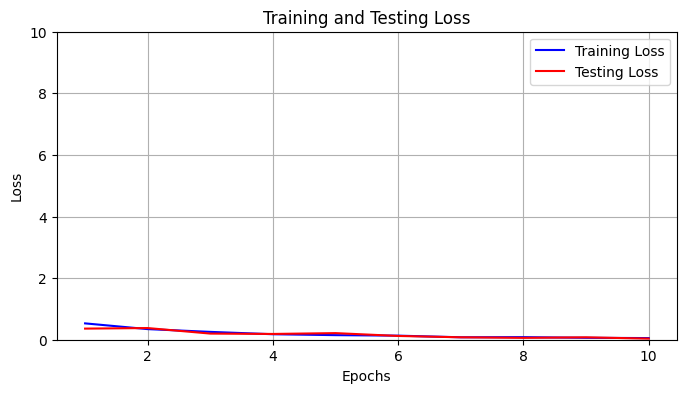

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.legend()
plt.grid(True)
plt.show()

96/96 [==============================] - 15s 154ms/step


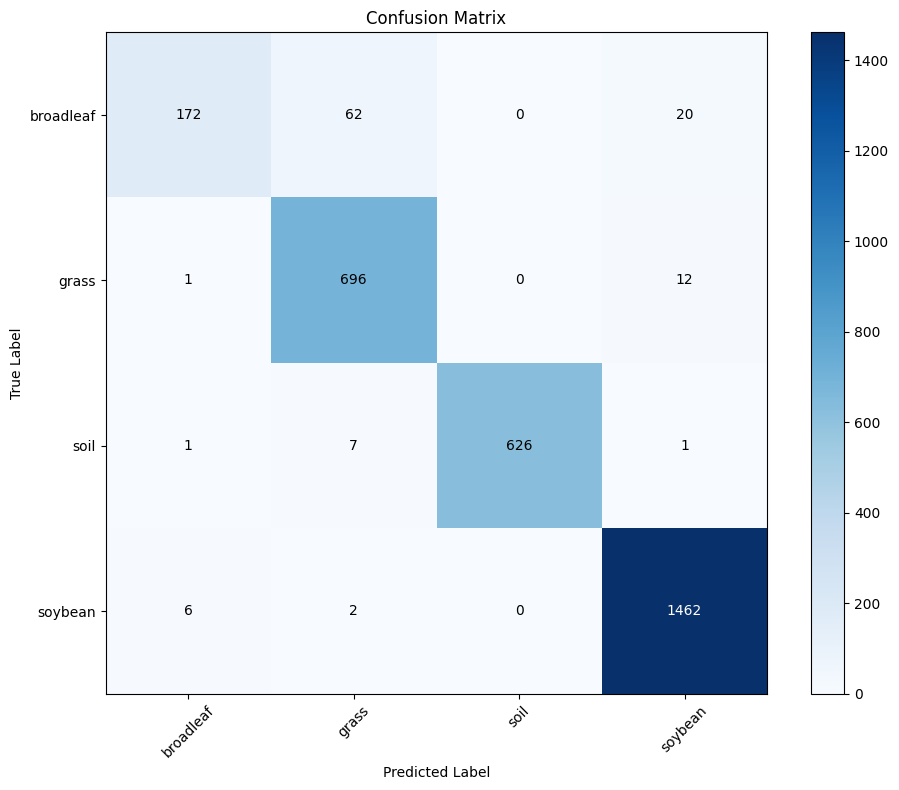

In [ ]:
y_pred = Vgg19.predict(VGG19_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(VGG19_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
y_pred = Vgg19.predict(VGG19_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(VGG19_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def Vgg19_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = Vgg19.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

In [ ]:
Vgg19_pred('/content/weed-detection-in-soybean-crops/dataset/grass/1003.tif')

##Lenet

In [ ]:
Lenet = Sequential()

# Block 1
Lenet.add(Conv2D(6, (5, 5), activation='relu', input_shape=(227,227, 3)))
Lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
Lenet.add(Conv2D(16, (5, 5), activation='relu'))
Lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening the output for fully connected layers
Lenet.add(Flatten())

# Fully Connected Layers
Lenet.add(Dense(120, activation='relu'))
Lenet.add(Dense(84, activation='relu'))

# Output Layer
Lenet.add(Dense(len(labels), activation='softmax'))

In [ ]:
Lenet.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
Lenet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 223, 223, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_73 (Conv2D)          (None, 107, 107, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 53, 53, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 44944)             0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [ ]:
lenet_history=Lenet.fit(Lenet_X_train,Lenet_Y_train, validation_data=(Lenet_X_test,Lenet_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
100/100 [==============================] - 4s 29ms/step - loss: 21.3402 - accuracy: 0.5562 - val_loss: 0.6910 - val_accuracy: 0.7113
Epoch 2/10
100/100 [==============================] - 2s 17ms/step - loss: 0.3928 - accuracy: 0.8528 - val_loss: 0.6624 - val_accuracy: 0.7175
Epoch 3/10
100/100 [==============================] - 2s 21ms/step - loss: 0.1692 - accuracy: 0.9566 - val_loss: 0.6613 - val_accuracy: 0.7400
Epoch 4/10
100/100 [==============================] - 2s 20ms/step - loss: 0.0660 - accuracy: 0.9937 - val_loss: 0.7173 - val_accuracy: 0.7462
Epoch 5/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0287 - accuracy: 0.9994 - val_loss: 0.7894 - val_accuracy: 0.7400
Epoch 6/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.8449 - val_accuracy: 0.7350
Epoch 7/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.8847 - val_accuracy: 0.730

In [ ]:
train_loss = lenet_history.history['loss']
train_accuracy = lenet_history.history['accuracy']
test_loss = lenet_history.history['val_loss']
test_accuracy = lenet_history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)



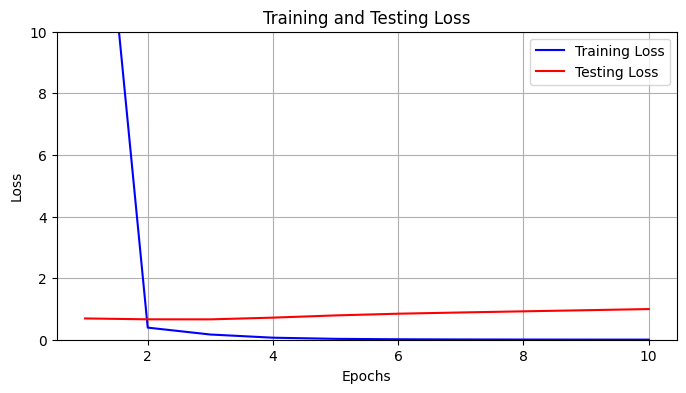

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.legend()
plt.grid(True)
plt.show()

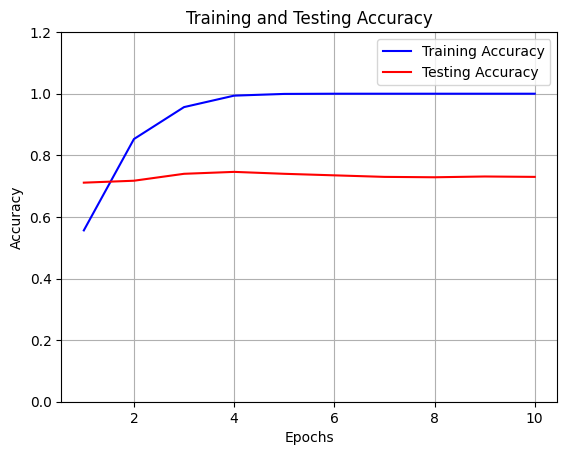

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
plt.show()

25/25 [==============================] - 0s 9ms/step


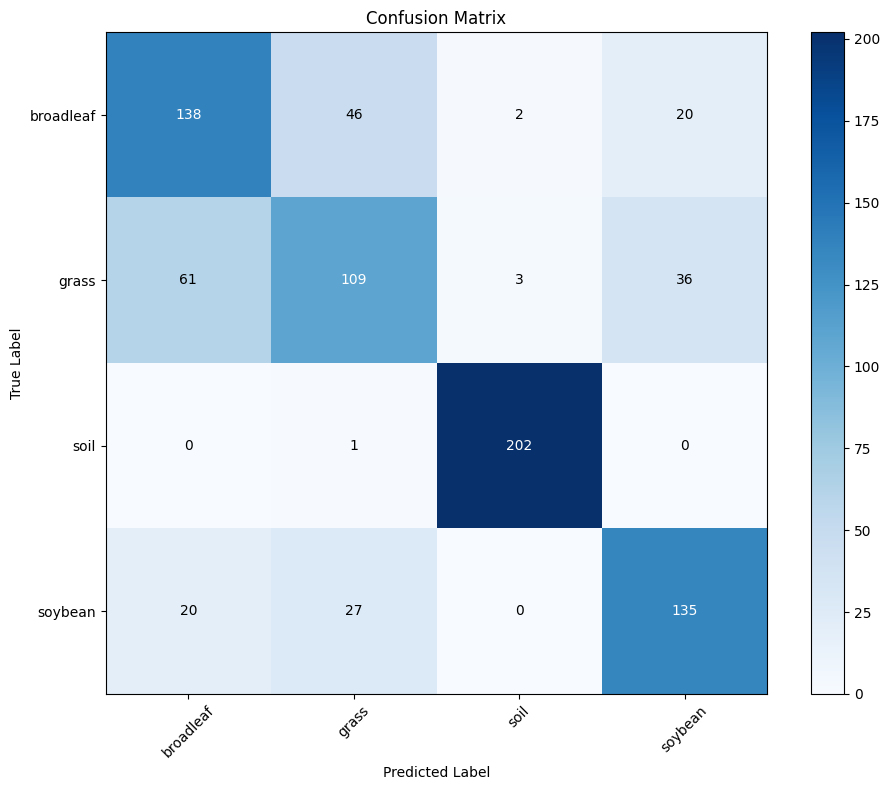

In [ ]:
y_pred = Lenet.predict(Lenet_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Lenet_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

100/100 [==============================] - 1s 7ms/step


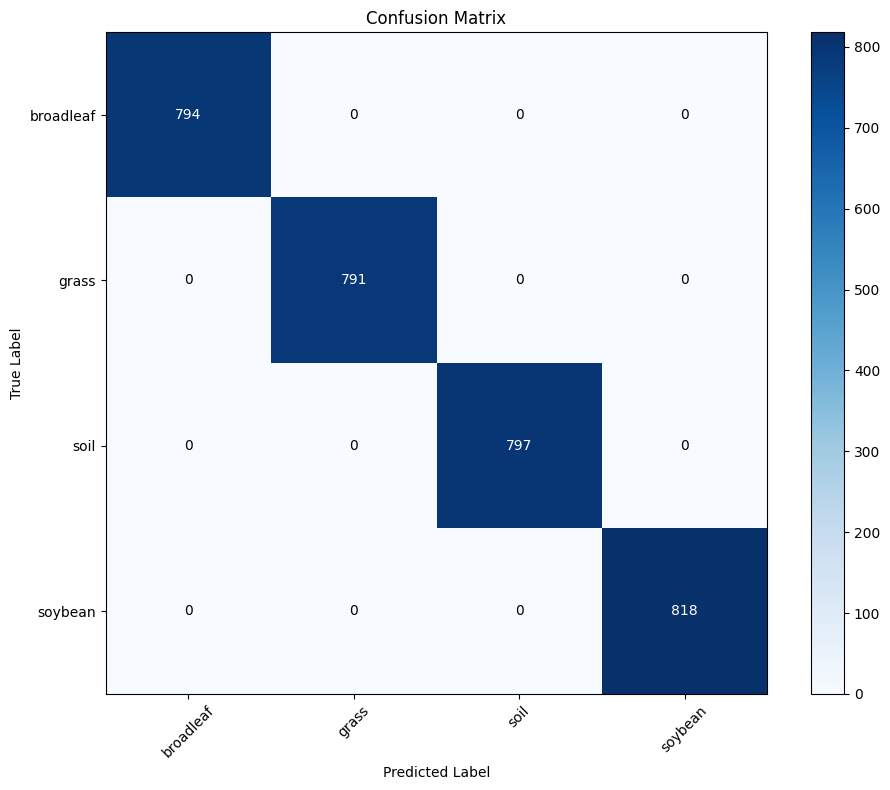

In [ ]:
y_pred = Lenet.predict(Lenet_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Lenet_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def Lenet_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = Lenet.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 107ms/step


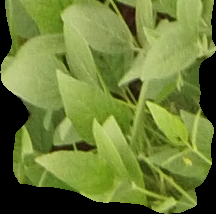

Predicted class: soybean


In [ ]:
Lenet_pred('/content/drive/MyDrive/soyaweed/soybean/445.tif')

##Resnet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, Activation

def resnet_block(model, filters, strides=(1, 1)):
    model.add(Conv2D(filters, (3, 3), strides=strides, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    return model

def resnet18_model(input_shape=(227, 227, 3)):
    model = Sequential()

    # Initial Convolution
    model.add(Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # ResNet Blocks
    model = resnet_block(model, filters=64)
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    model = resnet_block(model, filters=128, strides=(2, 2))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    model = resnet_block(model, filters=256, strides=(2, 2))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    model = resnet_block(model, filters=512, strides=(2, 2))
    model.add(AveragePooling2D((1, 1)))  # Average pooling instead of max pooling
    model.add(Flatten())

    # Classification Head
    model.add(Dense(len(labels), activation='softmax'))

    return model

# Create the ResNet-18 model
resnet18 = resnet18_model()


In [ ]:
resnet18.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
resnet18.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (None, 114, 114, 64)      9472      
                                                                 
 batch_normalization_113 (Ba  (None, 114, 114, 64)     256       
 tchNormalization)                                               
                                                                 
 activation_75 (Activation)  (None, 114, 114, 64)      0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 57, 57, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_188 (Conv2D)         (None, 57, 57, 64)        36928     
                                                                 
 batch_normalization_114 (Ba  (None, 57, 57, 64)     

In [ ]:
resnet_history=resnet18.fit(Resnet_X_train,Resnet_Y_train,validation_data=(Resnet_X_test,Resnet_Y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
100/100 [==============================] - 6s 62ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.4564 - val_accuracy: 0.8650
Epoch 2/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.8980 - val_accuracy: 0.7788
Epoch 3/10
100/100 [==============================] - 6s 56ms/step - loss: 0.0267 - accuracy: 0.9928 - val_loss: 0.4671 - val_accuracy: 0.8800
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0302 - accuracy: 0.9928 - val_loss: 0.6187 - val_accuracy: 0.8575
Epoch 5/10
100/100 [==============================] - 5s 52ms/step - loss: 0.0129 - accuracy: 0.9950 - val_loss: 0.6820 - val_accuracy: 0.8338
Epoch 6/10
100/100 [==============================] - 6s 56ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.4566 - val_accuracy: 0.8637
Epoch 7/10
100/100 [==============================] - 5s 55ms/step - loss: 0.0322 - accuracy: 0.9887 - val_loss: 1.3872 - val_accuracy: 0.7113

In [ ]:
train_loss = resnet_history.history['loss']
train_accuracy = resnet_history.history['accuracy']
test_loss = resnet_history.history['val_loss']
test_accuracy = resnet_history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)



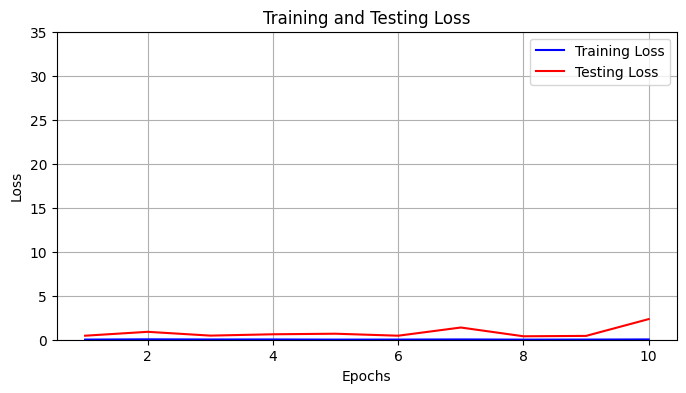

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.show()

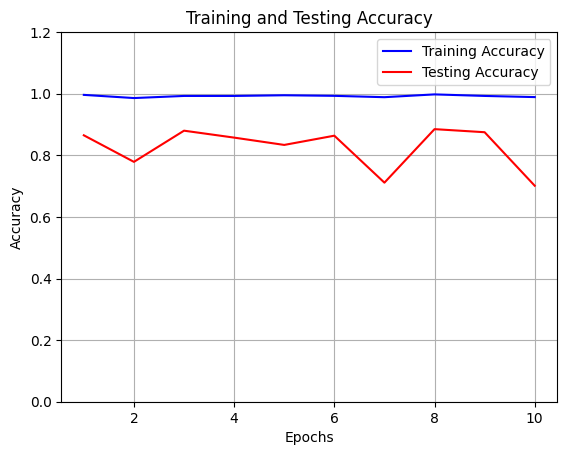

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
plt.show()

25/25 [==============================] - 1s 17ms/step


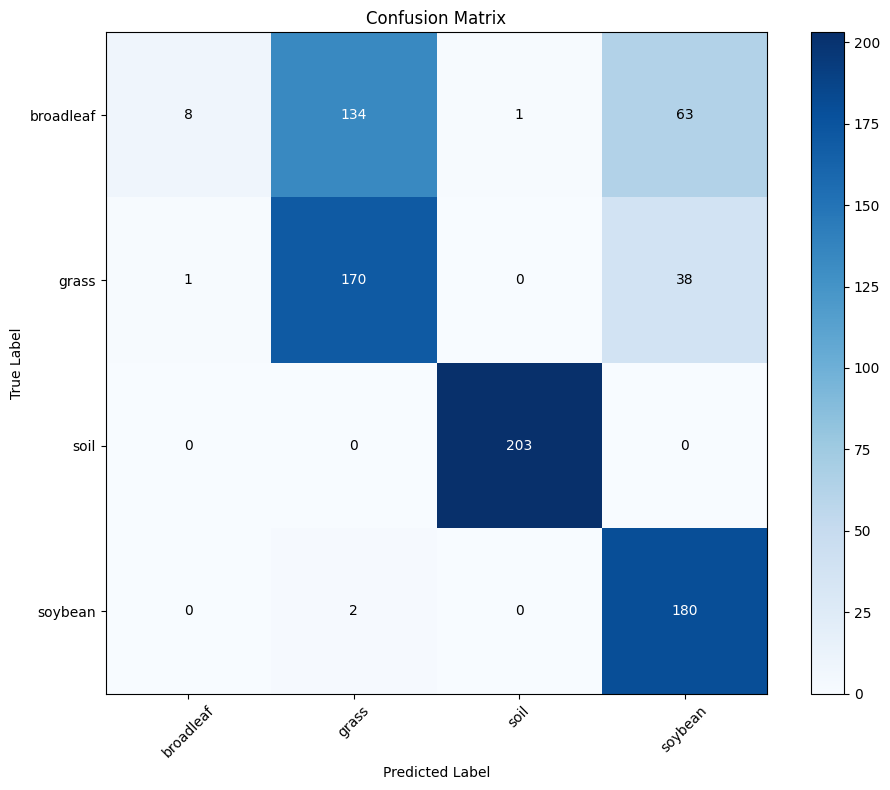

In [ ]:
y_pred = resnet18.predict(Resnet_X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Resnet_Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

100/100 [==============================] - 1s 15ms/step


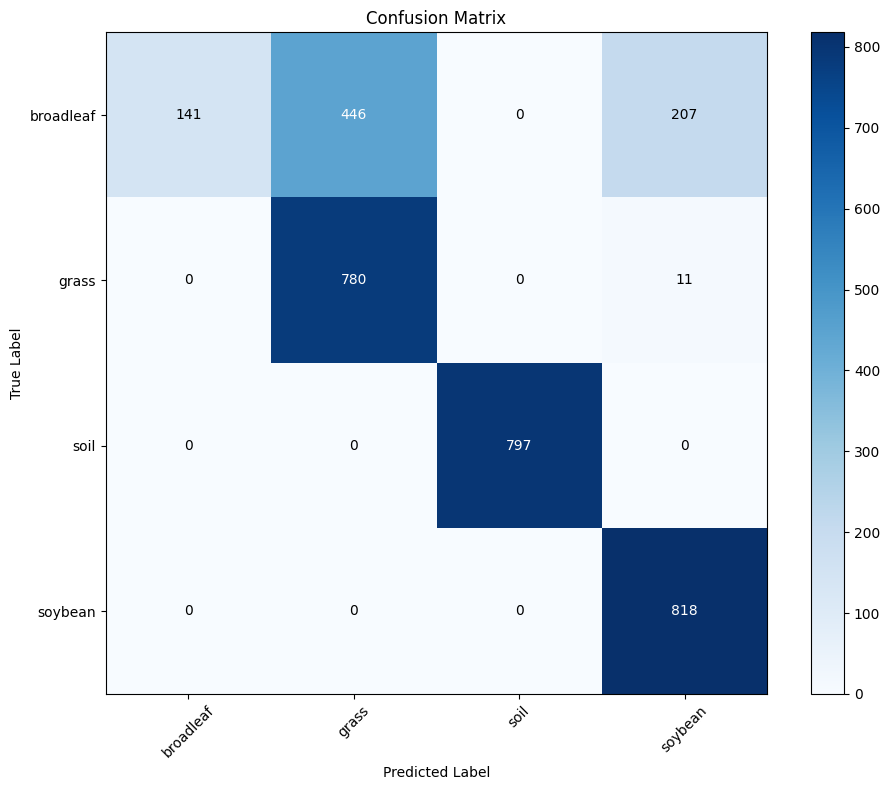

In [ ]:
y_pred = resnet18.predict(Resnet_X_train)

# Convert predictions from one-hot encoding to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Resnet_Y_train, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations for each cell in the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
def resnet_pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=(227, 227))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = resnet18.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 23ms/step


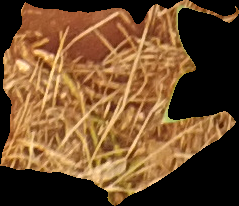

Predicted class: soil


In [ ]:
resnet_pred('/content/drive/MyDrive/soyaweed/soil/65.tif')